# RİDGE REGRESYON

In [146]:
#Şuana kadar öğrenilen kutuphaneler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split  #veri setini train ve test olarak ayrılması.
from sklearn.linear_model import LinearRegression   #linear regresyon 
from sklearn.metrics import mean_squared_error, r2_score  # hata kareler toplamı ve r2 ifadesi oluşturulan katsayıların acıklanabilirliği
import matplotlib.pyplot as plt  #Grafik çizimi için 
from sklearn.model_selection import cross_val_score

In [7]:
#Ridge regresyon modeli sklearn içerinde 
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

## Veri Seti
* **Oyuncuların attığı goller, assit sayıları, koşu sayıları, tecrube yıllarına göre bir fiyatlandırma yapılacak ve bu sayede alınacak transfer edilecek oyuncuya verilecek fiyat teklifinde(Salary) bir tahmin yapılacaktır.**

In [236]:
#ridge regresyonu için kullanılacak olan veri seti beyzbol oyuncularının içerdiği beyzbol veri seti
df = pd.read_csv("beyzbol_veri.csv")

df = df.dropna()   #Şuanda veri önişleme konu ile alakalı olmadığından işleme alınmamış eksik değerler uçurulmuştur.

dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])  #One-hat dönüşümü degisken_standart_donusumu.jpynb

y = df["Salary"]  #oyuncuların değerleri ile tahmin yapılacak. Bağımlı değişken

X_ = df.drop(["Salary","League", "Division", "NewLeague"], axis = 1).astype("float64") 
# df içinden league division ve newleague değişkenleri uçurarak one-hat dönüşümü yapılan bu değişkenler kullanılacak.

X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1) #bağımsız değişkenler.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.25, random_state = 42)

In [150]:
# Kısaca ridgede model oluşturma
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)
#alpha yani denklemdeki lamnda sayısı kullanıcı tarafından girilir. Şuanda 0.1 olarak seçilmiştir.
#İlerleyen safhada lamda değeri en az hata kareler toplamını verecek değer seçimi yapılacaktır.

In [151]:
# Her bir bağımsız değişken için katsayı üretildi X bağımsız 
ridge_model.coef_

array([-2.36536072e+00,  1.18139961e+01, -1.84437963e+01, -8.09672928e+00,
        6.90821894e+00,  3.91264829e+00, -2.56585704e+01,  1.30382265e-01,
       -1.16036796e+00,  3.84516020e+00,  2.66029876e+00, -1.92387379e-01,
       -1.29042053e+00,  1.33166266e-02,  1.99822259e-02, -3.53561414e-01,
        1.34121866e+02, -8.36655089e+01,  8.82625690e+01])

## En iyi sonuç veren yani en az hatayı alan Lamda seçimi (alpha)

* **En düşün RMS değerini veren lamda seçiminde rastgele lamda değerleri oluşturulacak. Bu lamda değerleri model oluşturrulken alpha değerlerine yazılacak(..set_params(alpha = ..)) ve modelin katsayıları gözlemlenecek.**

In [152]:
#hiperparametre değerleri... Kullanılacak olan lamdalar
lamdalar = 10*np.linspace(10,-2,100)*0.5
lamdalar

array([ 50.        ,  49.39393939,  48.78787879,  48.18181818,
        47.57575758,  46.96969697,  46.36363636,  45.75757576,
        45.15151515,  44.54545455,  43.93939394,  43.33333333,
        42.72727273,  42.12121212,  41.51515152,  40.90909091,
        40.3030303 ,  39.6969697 ,  39.09090909,  38.48484848,
        37.87878788,  37.27272727,  36.66666667,  36.06060606,
        35.45454545,  34.84848485,  34.24242424,  33.63636364,
        33.03030303,  32.42424242,  31.81818182,  31.21212121,
        30.60606061,  30.        ,  29.39393939,  28.78787879,
        28.18181818,  27.57575758,  26.96969697,  26.36363636,
        25.75757576,  25.15151515,  24.54545455,  23.93939394,
        23.33333333,  22.72727273,  22.12121212,  21.51515152,
        20.90909091,  20.3030303 ,  19.6969697 ,  19.09090909,
        18.48484848,  17.87878788,  17.27272727,  16.66666667,
        16.06060606,  15.45454545,  14.84848485,  14.24242424,
        13.63636364,  13.03030303,  12.42424242,  11.81

In [153]:
katsayilar =[]
ridge_model=Ridge()

for i in lamdalar: #lamdalarda gez
    ridge_model.set_params(alpha = i)  #alınan lamda değerini modelin alpha değerine yaz  
    ridge_model.fit(X_train, y_train)  #modeli fit et yani kur
    katsayilar.append(ridge_model.coef_) #kurduğun modelin katsayılarını katsayilar listesine ekle
#görüldüğü üzere her lamda değerine karşı elminzde 19 adet yani bağımsız değişken sayısı kadar katsayılar mevcut.

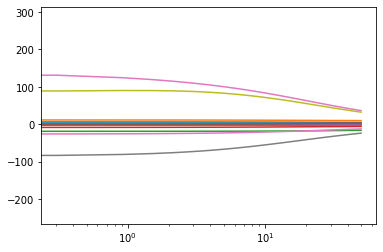

In [154]:
#Grafik üzerinden gözlemleyelim.
ax = plt.gca()
ax.plot(lamdalar, katsayilar)
ax.set_xscale("log")


* **Grafik lamda değerlerine karşılık(Xekseni) katsayilardaki değerleri(y ekseni) gösterilmektedir.**
* **Ridge regresyonu yapısı olarak katsayılarını sıfıra yaklaştırmaktadır. Grafiktede görülmektedir.**
* **Farklı lamda değerlerine karşılık,beta katsatılarının değerlerinin nasıl bir değer aldığı gözlemlenmektedir.**

### Ridge regresyon ile tahmin.

In [155]:
#modelimizi train üzerinden kuralım
ridge_model = Ridge().fit(X_train, y_train)  #alpha değeri şuan girilmedi en son ne ise o olacaktır.

In [156]:
#x train değerlerine göre y tahmin değerleri bulundu.
y_train_tahmin = ridge_model.predict(X_train)

In [157]:
#gerçek y değer
y_train.head()

112    1925.571
293     925.000
300    1150.000
119     362.500
9      1100.000
Name: Salary, dtype: float64

In [158]:
#tamin değerleri
y_train_tahmin[0:10]

array([1299.90755298,  810.18874543,  806.84484345,  321.74043473,
        821.93992616,  221.87325532,  263.35539356,  594.93256336,
        102.69512854,  231.66222965])

### Train Hatası

* **TRAİN(EĞİTİM) HATASI MODELLERİN KATSATILARI SEÇİMİNDE KULLANILAN HATADIR. TRAİN HATASI TEST HATASININ KÖTÜ BİR TAHMİNCİSİDİR.**

In [159]:
# Train HATASI
MSE_train =mean_squared_error(y_train, y_train_tahmin)
RMSE_train = np.sqrt(MSE_train)
RMSE_train, MSE_train

(198.42873506079243, 39373.96289782616)

In [166]:
#Train hatası Cross Validation ile kurulduktan sonra RMSE hatası
RMSE_train_CV=np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error" )))
RMSE_train_CV

353.380713646868

### Test Hatası

* **TEST HATASI MODEL KARŞILAŞTIRMADA KULLANILACAK OLAN HATADIR.**

In [167]:
#oluşturulan model ile test kısmı ile ayıralan veri değerleri üzerinde bir tahmin işlemi yapılacak ve burdan
#alınacak hata test hatası olacaktır.

In [169]:
y_test_tahmin = ridge_model.predict(X_test)

array([274.88569992, 829.42868106, 551.05269241, 442.05561226,
       193.36719922, 496.35183821, 677.44789875, 516.90104556,
       465.686074  , 470.01063461])

In [171]:
#gerçek y değeri
y_test[0:5]

148    850.0
154    277.5
318    875.0
279    150.0
88     260.0
Name: Salary, dtype: float64

In [172]:
#tahmin edilen y değeri
y_test_tahmin[0:5]

array([274.88569992, 829.42868106, 551.05269241, 442.05561226,
       193.36719922])

In [176]:
MSE_test = mean_squared_error(y_test, y_test_tahmin)
RMSE_test = np.sqrt(MSE_test)
RMSE_test, MSE_test

(396.3236907086229, 157072.4678169042)

# MODEL TUNİNG  Optimum lamda değerinin bulunup hatalarının karşılaştırılması.

* **Lamda değeri minimum değerde MSE yada RMSE değerini veren optimum lamda değerini bularak tahmin işleminin yapılması.**

In [179]:
ridge_model = Ridge().fit(X_train, y_train)  #train üzerinden model oluşturulması 
y_tahmin = ridge_model.predict(X_test)  #oluşturulan model ile test verileri üzerinde tahmin yapılması
RMSE = np.sqrt(np.mean(mean_squared_error(y_test, y_tahmin))) #hata kareler toplamının karekoku
RMSE

396.3236907086229

In [183]:
# uygun lamda bulunması için oluşturulan lamda listeleri.
lamdalar1 = 10*np.linspace(10,-2,100)*0.5
lamdalar2 = np.random.randint(0,1000,100)

In [184]:
#yukarıda yapılan donguyu kısaltan RidgeCV kutuphaneninin kullanılması
from sklearn.linear_model import RidgeCV

In [232]:
ridge_model = RidgeCV(alphas = lamdalar1, scoring = "neg_mean_squared_error", 
                      cv = 10, normalize = True )
ridge_model.fit(X_train, y_train)
#RidgeCV algoritması optimum alpha yı bularak model oluşturmaktadır. lamdalar listesi girilir
#Lamdaları karşılaştıracak olçüt girilir(MSE). Cross validation yapılır. Normalize edilieler 0-1 arasında bir
#standartlandırma yapılır. en son olarak model train üzerinde kurulur.

RidgeCV(alphas=array([ 50.        ,  49.39393939,  48.78787879,  48.18181818,
        47.57575758,  46.96969697,  46.36363636,  45.75757576,
        45.15151515,  44.54545455,  43.93939394,  43.33333333,
        42.72727273,  42.12121212,  41.51515152,  40.90909091,
        40.3030303 ,  39.6969697 ,  39.09090909,  38.48484848,
        37.87878788,  37.27272727,  36.66666667,  36.06060606,
        35.45454545,  34.84848485,  34.24242424,  33.63636364,
        33...
         3.93939394,   3.33333333,   2.72727273,   2.12121212,
         1.51515152,   0.90909091,   0.3030303 ,  -0.3030303 ,
        -0.90909091,  -1.51515152,  -2.12121212,  -2.72727273,
        -3.33333333,  -3.93939394,  -4.54545455,  -5.15151515,
        -5.75757576,  -6.36363636,  -6.96969697,  -7.57575758,
        -8.18181818,  -8.78787879,  -9.39393939, -10.        ]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [233]:
ridge_model.alpha_  #kurulan modelin alphalar arasında optimum değer olarak 2.12 değerini almış

2.1212121212121193

In [234]:
y_tahmin = ridge_model.predict(X_test)

## Final model. Optimum alphayı bulunmuş model kurmak


In [235]:
#lamdalar listesinden optimum lamda bulunduktan sonra Ridge ile son olarak optimum değer ile bir model oluşturulur.
ridge_model_tuned= Ridge(ridge_model.alpha_).fit(X_train, y_train)
y_tahmin_tuned = ridge_model_tuned.predict(X_test)
RMSE_tuned = np.sqrt(mean_squared_error(y_test, y_tahmin_tuned))
RMSE_tuned

394.1892169837763